In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import scanpy as sc
import muon as mu
import anndata
import mudata
import pandas as pd

In [37]:
adata = sc.read("data/human_pancreas_norm_complexBatch.h5ad")
adata

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors'
    layers: 'counts'

In [38]:
sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# sc.pp.scale(adata, max_value=10)

## Unintegrated

In [12]:
sc.tl.pca(adata)

In [13]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [14]:
sc.tl.umap(adata)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


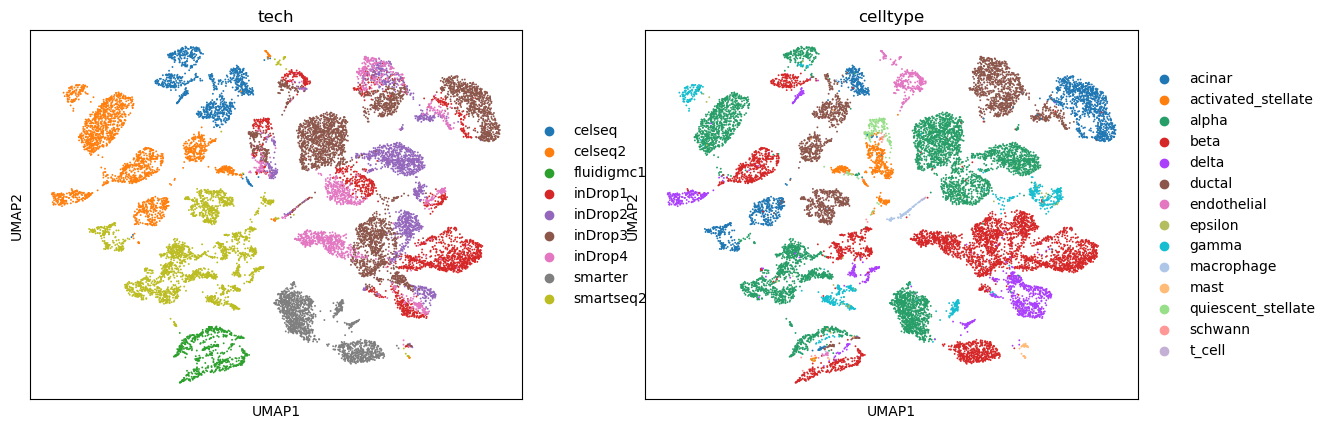

In [15]:
sc.pl.umap(adata, color=['tech', 'celltype'])

In [24]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="pancreas")

In [25]:
from src.vae.model import VAE, ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = VAE(adata, model_params)

In [26]:
from src.vae.train import train_vae
hist = train_vae(model, adata, batch_keys=["tech"], params=train_params)

100%|█████████████████████████████████████████| 103/103 [01:02<00:00,  1.66it/s]

EarlyStopping (epoch: 1): train loss improved to 0.04821150545762814



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 1): valid loss improved to 5.9002251991858845



100%|█████████████████████████████████████████| 103/103 [01:01<00:00,  1.67it/s]

EarlyStopping (epoch: 2): train loss improved to 0.03298543408279972



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 2): valid loss improved to 4.2762267131071825



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 3): valid loss improved to 3.5727028296544003



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 4): valid loss improved to 3.2020425979907694



100%|█████████████████████████████████████████| 103/103 [01:01<00:00,  1.67it/s]

EarlyStopping (epoch: 5): train loss improved to 0.02289675878505132



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 5): valid loss improved to 3.011117907670828



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 6): valid loss improved to 2.881035382931049



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 7): valid loss improved to 2.7663658673946676



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 8): valid loss improved to 2.7502000606977024



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 9): valid loss improved to 2.7062247670613804



100%|█████████████████████████████████████████| 103/103 [01:02<00:00,  1.65it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.020937407849081505. Stopping.



100%|█████████████████████████████████████████| 103/103 [01:02<00:00,  1.65it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.02089567848490832. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.81it/s]

EarlyStopping (epoch: 16): valid loss improved to 2.6944227035229025



 35%|██████████████▋                           | 36/103 [00:23<00:44,  1.51it/s]


KeyboardInterrupt: 

In [55]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tech", "celltype"], batch_keys=["tech"], train_params=train_params)

  0%|                                                                                | 0/128 [00:06<?, ?it/s]


KeyboardInterrupt: 

No normalization:

In [28]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="pancreas_unnorm")

In [29]:
from src.vae.model import VAE, ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = VAE(adata, model_params)

In [30]:
from src.vae.train import train_vae
hist = train_vae(model, adata, batch_keys=["tech"], params=train_params)

100%|█████████████████████████████████████████| 103/103 [00:53<00:00,  1.92it/s]

EarlyStopping (epoch: 1): train loss improved to 0.04763836487701311



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 1): valid loss improved to 6.175202112931472



100%|█████████████████████████████████████████| 103/103 [00:53<00:00,  1.91it/s]

EarlyStopping (epoch: 2): train loss improved to 0.032510062493881345



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 2): valid loss improved to 4.7817050860478325



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 3): valid loss improved to 3.8203152418136597



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.04it/s]

EarlyStopping (epoch: 4): valid loss improved to 3.197376462129446



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.07it/s]

EarlyStopping (epoch: 5): valid loss improved to 2.8896646316234884



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 6): train loss improved to 0.02199499678948325



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.06it/s]

EarlyStopping (epoch: 6): valid loss improved to 2.7652464371461134



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 7): valid loss improved to 2.7156796638782206



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 8): valid loss improved to 2.6843130863629856



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 10): valid loss improved to 2.661188244819641



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.01it/s]

EarlyStopping (epoch: 11): valid loss improved to 2.6410519159757175



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.01it/s]

EarlyStopping (epoch: 13): valid loss improved to 2.6202718432133016



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.020816865143817784. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.02074820661490221. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 17): valid loss improved to 2.6087143604572



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.020682523397033064. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 18): valid loss improved to 2.587272020486685



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.02062844118513437. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:53<00:00,  1.91it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.020599536102539433. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.020492040296858024. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 21): valid loss improved to 2.5687391941363993



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.020436216264860814. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.02044752500112709. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.020406474834268943. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.020462045356636965. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.020385135689203814. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.02it/s]

EarlyStopping (epoch: 26): valid loss improved to 2.5585640577169566



100%|█████████████████████████████████████████| 103/103 [00:55<00:00,  1.87it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.020355878882351745. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.020302363180650276. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.020281091394973867. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.020239687111485966. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.00it/s]

EarlyStopping (epoch: 30): valid loss improved to 2.543722473658048



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.020240558553678942. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 31): valid loss improved to 2.5330972854907694



100%|█████████████████████████████████████████| 103/103 [00:55<00:00,  1.87it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.020217590703167383. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.87it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.020253148255390048. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.02021807685511479. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.02017397844168304. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.02016931857284086. Stopping.



 19%|████████▏                                 | 20/103 [00:12<00:52,  1.60it/s]


KeyboardInterrupt: 

100%|██████████████████████████████████████████████████████████████████████| 128/128 [00:06<00:00, 19.19it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


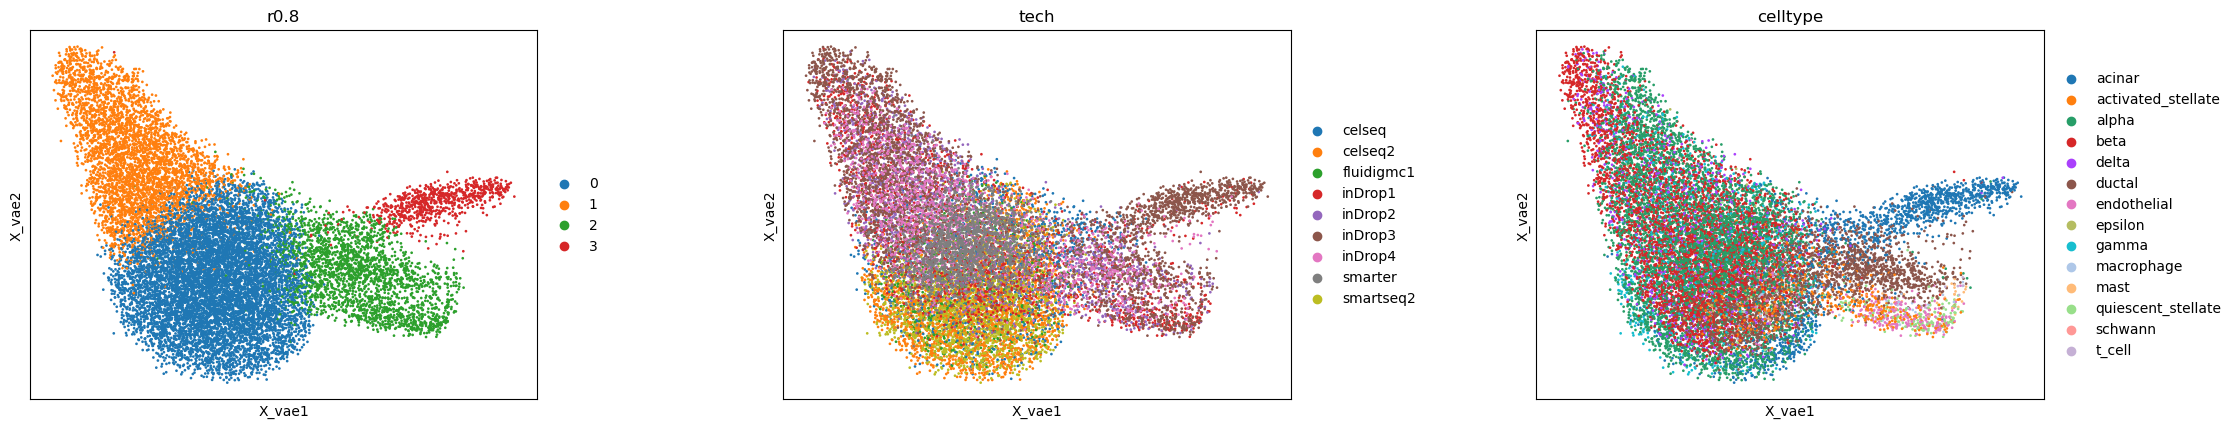

In [56]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tech", "celltype"], batch_keys=["tech"], train_params=train_params)

euclidean dist, with log doesn't train well, best with norm alone, 0.3 of private loss

In [57]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="pancreas_0.5priv_30h")

In [58]:
from src.vae.model import VAE, ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=30, use_cuda=True)
torch.set_num_threads(16)
model = VAE(adata, model_params)

In [59]:
from src.vae.train import train_vae
hist = train_vae(model, adata, batch_keys=["tech"], params=train_params)

100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:56<00:00,  1.83it/s]

EarlyStopping (epoch: 1): train loss improved to 0.07769126353578593



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.87it/s]

EarlyStopping (epoch: 1): valid loss improved to 10.369581809410683



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.86it/s]

EarlyStopping (epoch: 2): valid loss improved to 10.07282539514395



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 3): valid loss improved to 9.766862392425537



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.87it/s]

EarlyStopping (epoch: 4): valid loss improved to 9.439134982916025



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.87it/s]

EarlyStopping (epoch: 5): valid loss improved to 9.121372479658861



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:56<00:00,  1.82it/s]

EarlyStopping (epoch: 6): train loss improved to 0.06695192854443564



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.87it/s]

EarlyStopping (epoch: 6): valid loss improved to 8.743577003479004



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.87it/s]

EarlyStopping (epoch: 7): valid loss improved to 8.434050688376793



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.87it/s]

EarlyStopping (epoch: 8): valid loss improved to 8.176978734823374



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 9): valid loss improved to 7.945619821548462



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.81it/s]

EarlyStopping (epoch: 10): valid loss improved to 7.653783321380615



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 11): train loss improved to 0.05687080734060812



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 11): valid loss improved to 7.40262954051678



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 12): valid loss improved to 7.215103241113516



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 13): valid loss improved to 7.135143848565908



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 14): valid loss improved to 6.885174732941848



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.86it/s]

EarlyStopping (epoch: 15): valid loss improved to 6.816521571232722



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 16): valid loss improved to 6.691764849882859



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 17): valid loss improved to 6.519475973569429



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 19): valid loss improved to 6.320631504058838



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.80it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.04848283134949476. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 21): valid loss improved to 6.25836520928603



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.04800250367416038. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 22): valid loss improved to 6.2071581070239725



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.04764378375563172. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 23): valid loss improved to 6.193971688930805



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.04734516096497164. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.85it/s]

EarlyStopping (epoch: 24): valid loss improved to 6.071285559580876



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.04722808854628137. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.046964154940259135. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 27): train loss improved to 0.04671720623378761



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 27): valid loss improved to 6.055837961343618



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.78it/s]

EarlyStopping (epoch: 29): valid loss improved to 5.95148673424354



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 32): valid loss improved to 5.935489324422983



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 33): valid loss improved to 5.86629841877864



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 35): valid loss improved to 5.833999450390156



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.0457078901150444. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.80it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.045634666720859335. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 38): valid loss improved to 5.815582385429969



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.045688318705931735. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.045945598823521165. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.045841717456234. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.80it/s]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.045827686472823266. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 43): train loss hasn't improved: 0.04562178223881727. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 43): valid loss improved to 5.781462816091684



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:58<00:00,  1.77it/s]

EarlyStopping (epoch: 44): train loss hasn't improved: 0.04546101467157311. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:58<00:00,  1.78it/s]

EarlyStopping (epoch: 45): train loss hasn't improved: 0.04558919621350792. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:58<00:00,  1.77it/s]

EarlyStopping (epoch: 46): train loss hasn't improved: 0.04533943251224476. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 47): train loss hasn't improved: 0.045329546027854856. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.80it/s]

EarlyStopping (epoch: 48): train loss hasn't improved: 0.04544422017941262. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 48): valid loss improved to 5.756418686646682



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 49): train loss hasn't improved: 0.045457220495952445. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:59<00:00,  1.73it/s]

EarlyStopping (epoch: 50): train loss hasn't improved: 0.04525122356887812. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 51): train loss hasn't improved: 0.0452316435908871. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 51): valid loss improved to 5.746086982580332



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 52): train loss hasn't improved: 0.04518727721352925. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 53): train loss hasn't improved: 0.04521468587160019. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 54): train loss hasn't improved: 0.0455899096681434. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.78it/s]

EarlyStopping (epoch: 55): train loss hasn't improved: 0.04533172201355283. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 56): train loss hasn't improved: 0.04520255830714558. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 57): train loss hasn't improved: 0.04522117049309281. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 58): train loss hasn't improved: 0.04542962845296907. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.80it/s]

EarlyStopping (epoch: 59): train loss hasn't improved: 0.045052272297416374. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [01:05<00:00,  1.56it/s]

EarlyStopping (epoch: 60): train loss hasn't improved: 0.0450683803696616. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:58<00:00,  1.76it/s]

EarlyStopping (epoch: 61): train loss hasn't improved: 0.045150806466298724. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 61): valid loss hasn't improved: 5.83901282457205. Stopping.


100%|██████████████████████████████████████████████████████████████████████| 128/128 [00:06<00:00, 18.43it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


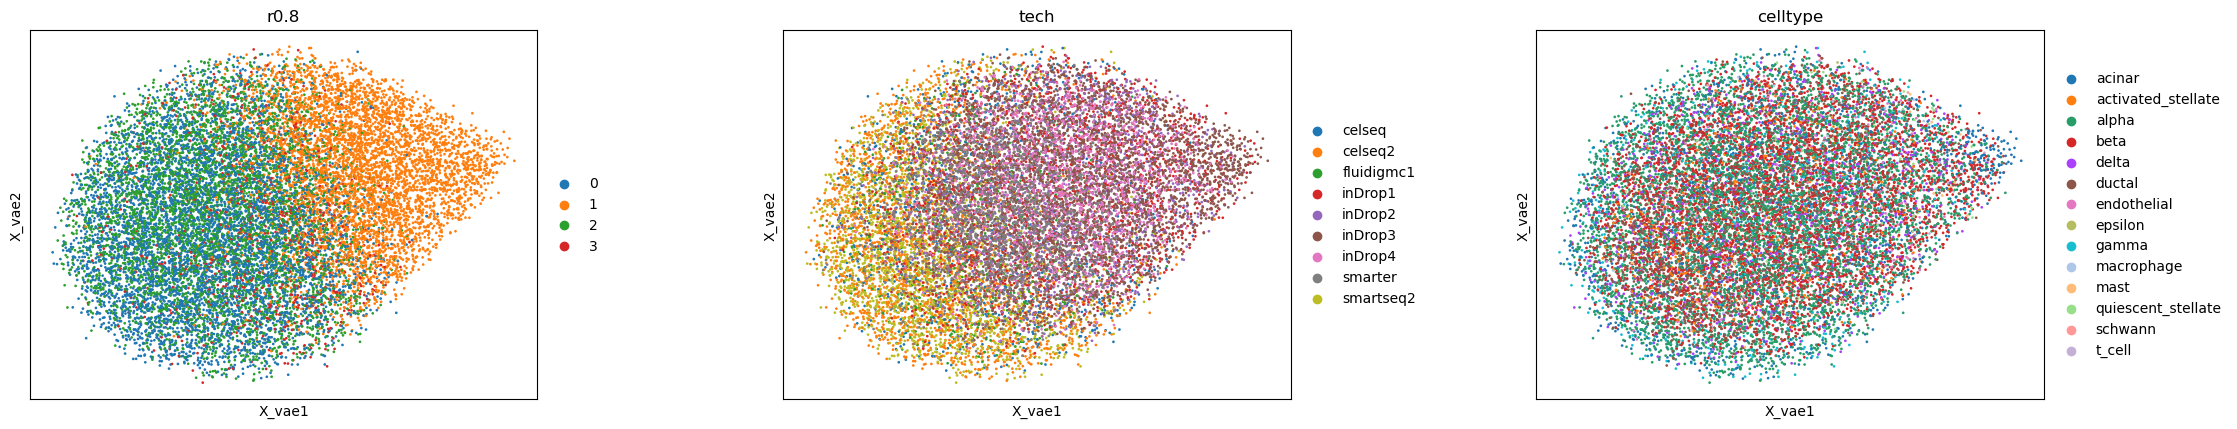

In [60]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tech", "celltype"], batch_keys=["tech"], train_params=train_params)

MNN only

In [5]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="pancreas_512")

In [12]:
from src.vae.model import VAE, ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = VAE(adata, model_params)

In [23]:
from src.vae.train import train_vae
hist = train_vae(model, adata, batch_keys=["tech"], params=train_params)

100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.79it/s]

EarlyStopping (epoch: 1): train loss improved to 0.006790712829402092



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  2.00it/s]

EarlyStopping (epoch: 1): valid loss improved to 0.8732395470142365



100%|██████████████████████████████████████████████████████████████████████| 103/103 [00:57<00:00,  1.80it/s]

EarlyStopping (epoch: 11): train loss hasn't improved: 0.006801896466412011. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 26/26 [00:13<00:00,  1.99it/s]

EarlyStopping (epoch: 11): valid loss hasn't improved: 0.8784410517949325. Stopping.


100%|██████████████████████████████████████████████████████████████████████| 128/128 [00:07<00:00, 18.05it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


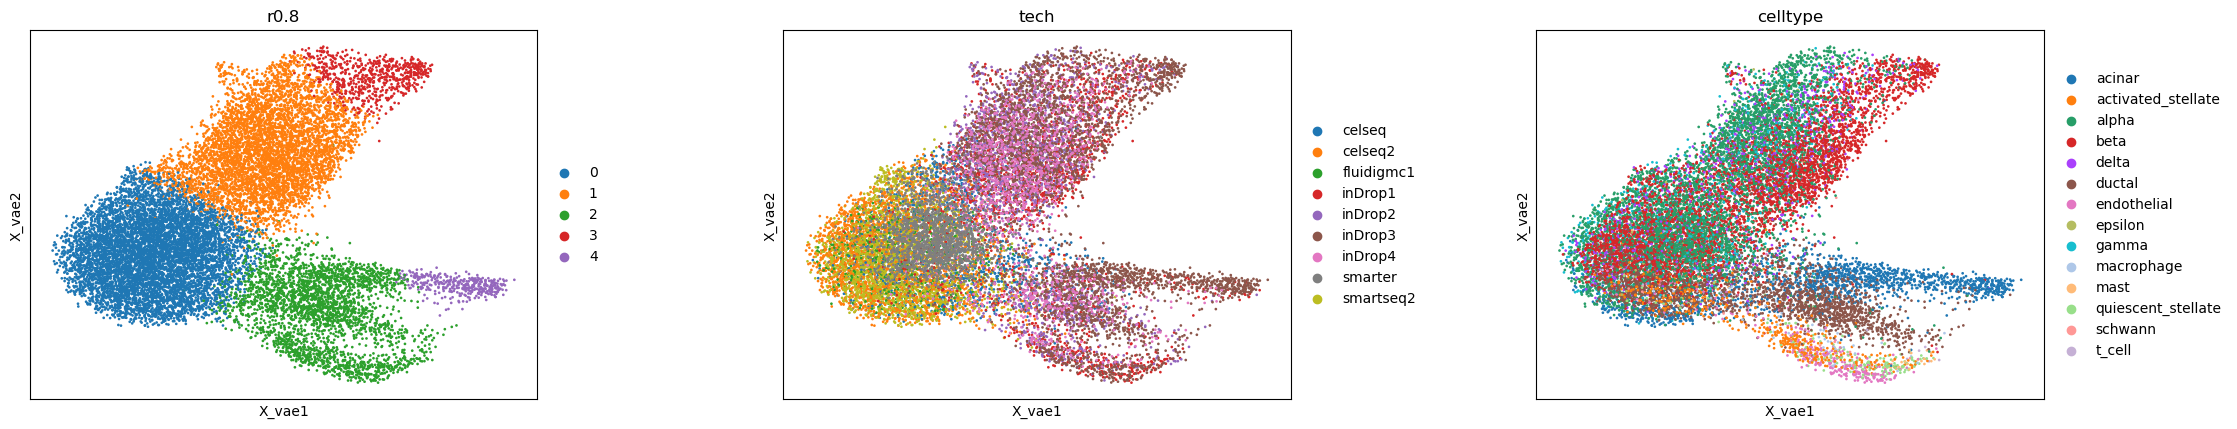

In [46]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tech", "celltype"], batch_keys=["tech"], train_params=train_params)